/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


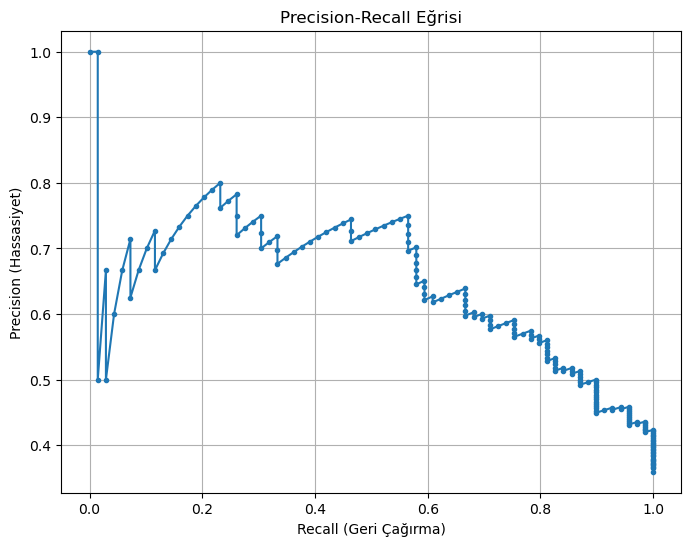

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Veri setini yükledik.
data = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

# Bağımsız değişkenleri ve hedef değişkeni ayırdık.
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Önemli özellikleri seçtik.(Korelasyon haritasına göre).
important_features = ["Glucose", "BMI", "Age", "Pregnancies"]

X_important = X[important_features]

# Veriyi train ve test kümelerine ayırdık.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.25, random_state=42)

# Hiperparametre optimizasyonu
param_grid = {
    'n_estimators': [50, 100, 200, 300], # Ağaç sayısı
    'max_depth': [None, 5, 10, 20],            # Ağacın maksimum derinliği
    'min_samples_split': [2, 5, 10],           # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],              # Yapraklar için minimum örnek sayısı
  }

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)



# Test veri kümesi üzerinde tahmin yaptık
y_pred = grid_search.predict(X_test)

# Doğruluk değerini hesapla
accuracy = accuracy_score(y_test, y_pred)



# Test veri kümesi üzerinde olasılık değerlerini alalım
y_prob = grid_search.predict_proba(X_test)[:, 1]

# Precision-Recall eğrisini hesaplayalım
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Precision-Recall eğrisi
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall (Geri Çağırma)')
plt.ylabel('Precision (Hassasiyet)')
plt.title('Precision-Recall Eğrisi')
plt.grid(True)
plt.show()
